In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = [ 'Federal District', 'State of Acre','State of Alagoas','State of Amapá', 'State of Amazonas', 
                    'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
                    'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais',
                    'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí', 
                    'State of Rio de Janeiro', 'State of Rio Grande do Norte',
                    'State of Rio Grande do Sul', 'State of Rondônia', 'State of Roraima', 'State of Santa Catarina', 
                    'State of São Paulo', 'State of Sergipe', 'State of Tocantins'
                  ]

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']


In [4]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r in regions_list:
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==r) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
# sdf = getAllRegionsGroups(regions_list=['State of São Paulo'])   #, 'State of Rio de Janeiro'
# print(sdf)
# plotGroups(sdf['State of São Paulo'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [5]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, regions_abbr=regions_abbr_BR,
                       country="Brazil"):
    regions_dict = {}
    
#     print(regions_list)
    for r in range(len(regions_list)):
        sub_df = covid_df[(covid_df['state']== regions_abbr[r])]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[regions_list[r]]=sub_df
        #print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13813       129  2021-07-18  Brazil     SC  TOTAL          0   17546   
13814       129  2021-07-18  Brazil     SE  TOTAL          0    5857   
13815       129  2021-07-18  Brazil     SP  TOTAL          0  134320   
13816       129  2021-07-18  Brazil     TO  TOTAL          0    3396   
13817       129  2021-07-18  Brazil  TOTAL  TOTAL          0  541510   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [6]:
# regions_selected = [regions_list_BR[i] for i in [24,25,26]]
# regions_selected_abbr = [regions_abbr_BR[i] for i in [24,25,26]]

# print(regions_selected_abbr)

# cases_df = getAllRegionsCovid()
# mob_df = getAllRegionsGroups()

# print(cases_df)


In [57]:
def getData():
    cases_df = getAllRegionsCovid(regions_list_BR,regions_abbr_BR)
    mob_df = getAllRegionsGroups(regions_list_BR)
    
    mobility_all = []
    cases_all = []
    mobility_dates = []
    cases_dates = []
    mobility_dict = {}
    cases_dict = {}
    vaccinated_all = []
    for r in regions_list_BR:
        newCases = cases_df[r]['newCases'].values
        newCases_norm = newCases/np.max(newCases)
        vaccinated = cases_df[r]['vaccinated'].values
        scaler = MinMaxScaler(feature_range=(-1,1))        
        mobility_norm = scaler.fit_transform(mob_df[r][categories_google_mobility].values)
        vaccinated_norm = np.nan_to_num(vaccinated)
        vaccinated_norm = vaccinated_norm/np.max(vaccinated_norm)
        covid_dates = cases_df[r]['date'].values
        
        mob_dates = mob_df[r]['date'].values
        mob_dates += np.timedelta64(7,'D') # com offset de 7 dias
        
        mobility_dict[r] = mobility_norm
        cases_dict[r] = newCases_norm
        
        
        '''print('mob_norm = ')
        print(len(mobility_norm))
        
        print('mob_dict = ')
        print(len(mobility_dict[r]))
        print('cases_norm = ')
        print(len(newCases_norm ))
        print('------------------------------------------')'''
        
        for i in range(len(newCases_norm)):
            
            if covid_dates[i] >= np.datetime64('2020-06-01T00:00:00.000000000'):
                cases_all.append(newCases_norm[i]) 
                cases_dates.append(covid_dates[i])
                vaccinated_all.append(vaccinated_norm[i])
            
        for i in range(len(mobility_norm)):
            if mob_dates[i] in covid_dates: 
                date_index = np.where(covid_dates == mob_dates[i])
                mob_vac = np.insert(mobility_norm[i],6,vaccinated_norm[date_index])
            else:
                mob_vac = np.insert(mobility_norm[i],6,0)
            if mob_dates[i] >= np.datetime64('2020-06-01T00:00:00.000000000'):
                mobility_all.append(mob_vac)
                mobility_dates.append(mob_dates[i])
        mobility_dict[r] = np.array(mobility_all)
    Y_data = (np.array([cases_all]).T)
    X_data = np.array(mobility_all)        
    return X_data, Y_data, mobility_dates, cases_dates, mobility_dict, cases_dict, vaccinated_all


X_data, Y_data, mobility_dates, cases_dates, mobility_dict, cases_dict, vaccinated = getData()

print(X_data.shape)
print(Y_data.shape)

(11259, 7)
(11151, 1)


In [58]:
print(mobility_dates[0] )


2020-06-01T00:00:00.000000000


In [59]:
# i = 0

# for group in categories_google_mobility:
#     print(group)
#     group_values = X_data[:,i]
#     fig, ax = plt.subplots(figsize=(8, 4))
#     plt.plot(cases_dates[:], Y_data[:], label="new_cases")
#     plt.plot(mobility_dates[:], group_values[:], label=group)
   
#     plt.legend(loc='best') 
#     plt.grid()
#     plt.show()
    
#     i+=1

In [60]:
print(cases_dates[0]+np.timedelta64(12,'W'))
print(len(cases_dates))
print(mobility_dates[14],cases_dates[1])

def getCorrespondentData(X_data,Y_data, mobility_dates,cases_dates):
    i = 0
    j = 0
    X_filter = []
    Y_filter = []
    while (i < len(mobility_dates)) and (j < len(cases_dates)):
#         print(mobility_dates[i]," - ", cases_dates[j])
        if mobility_dates[i] == cases_dates[j]:
            if not np.any(np.isnan(X_data[i])) and not np.isnan(Y_data[j]):
                #x = np.insert(X_data[i],6,vaccinated[j])
                X_filter.append(X_data[i])
                Y_filter.append(Y_data[j])
            i+=1
            j+=1
        elif (mobility_dates[i] < cases_dates[j]) or mobility_dates[i] > (cases_dates[j] + np.timedelta64(30,'W')):
            i += 1
        elif mobility_dates[i] > cases_dates[j]:
            j += 1
             
    return np.array(X_filter), np.array(Y_filter)

2020-08-24T00:00:00.000000000
11151
2020-06-15T00:00:00.000000000 2020-06-02T00:00:00.000000000


In [62]:
X_filter, Y_filter = getCorrespondentData(X_data,Y_data, mobility_dates,cases_dates)
print(X_filter.shape)
print(Y_filter.shape)

# i = 0

# for group in categories_google_mobility:
#     print(group)
#     group_values = X_filter[:,i]
#     fig, ax = plt.subplots(figsize=(16, 4))
#     plt.scatter(group_values[:], Y_filter[:], label=group) #com offset de 7 dias
# #     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
#     plt.legend(loc='best') 
#     plt.grid()
#     plt.show()
    
#     i+=1

(11028, 7)
(11028, 1)


In [63]:
from keras.models import Sequential
from keras.layers import Dense

# X_train = mobility_dict[regions_list_BR[1]][-460:,:]
# Y_train = cases_dict[regions_list_BR[1]][-470:-10]
# Y_train = Y_train.reshape((len(Y_train),1))



X_train = X_filter[:9000]
Y_train = Y_filter[:9000]
X_test = X_filter[9000:]
Y_test = Y_filter[9000:]
# X = mobility_norm[-460:,:]
# Y = newCases_norm[-470:-10]
# Y = Y.reshape((len(Y),1))

print("Mobility Features")
print(X_train[:5])
print("X shape: ",X_train.shape)


print("Covid Cases")
print(Y_train[:5])
print("Y shape: ",Y_train.shape)



Mobility Features
[[-0.50537634 -0.16129032 -0.76397516 -0.35802469 -0.2         0.4375
   0.        ]
 [-0.50537634 -0.11290323 -0.73913043 -0.33333333 -0.2         0.375
   0.        ]
 [-0.44086022 -0.08064516 -0.68944099 -0.30864198 -0.2         0.3125
   0.        ]
 [-0.41935484 -0.03225806 -0.61490683 -0.30864198 -0.2         0.375
   0.        ]
 [-0.39784946  0.11290323 -0.71428571 -0.2345679  -0.12380952  0.5
   0.        ]]
X shape:  (9000, 7)
Covid Cases
[[0.23021129]
 [0.23525702]
 [0.24093346]
 [0.28476821]
 [0.40523494]]
Y shape:  (9000, 1)


In [64]:
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='relu'))

In [65]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=700, batch_size=180)



Epoch 1/700
50/50 [==============================] - 1s 1ms/step - loss: 0.7246 - accuracy: 0.0124
Epoch 2/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.0123
Epoch 3/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.0123
Epoch 4/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.0122
Epoch 5/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.0129
Epoch 6/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.0118
Epoch 7/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.0143
Epoch 8/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.0130
Epoch 9/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.0130
Epoch 10/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.0129
Epoch 11/

50/50 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.0092
Epoch 83/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.0123
Epoch 84/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.0126
Epoch 85/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.0124
Epoch 86/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.0133
Epoch 87/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.0134
Epoch 88/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.0115
Epoch 89/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.0121
Epoch 90/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.0125
Epoch 91/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.0113
Epoch 92/700


50/50 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.0123
Epoch 163/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.0110
Epoch 164/700
50/50 [==============================] - 0s 997us/step - loss: 0.5203 - accuracy: 0.0128
Epoch 165/700
50/50 [==============================] - 0s 997us/step - loss: 0.5221 - accuracy: 0.0142
Epoch 166/700
50/50 [==============================] - 0s 977us/step - loss: 0.5203 - accuracy: 0.0133
Epoch 167/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.0127
Epoch 168/700
50/50 [==============================] - 0s 977us/step - loss: 0.5229 - accuracy: 0.0114
Epoch 169/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.0128
Epoch 170/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.0104
Epoch 171/700
50/50 [==============================] - 0s 997us/step - loss: 0.5227 - accuracy: 0

50/50 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.0131
Epoch 243/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.0136
Epoch 244/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.0147
Epoch 245/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.0141
Epoch 246/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.0127
Epoch 247/700
50/50 [==============================] - 0s 997us/step - loss: 0.5154 - accuracy: 0.0132
Epoch 248/700
50/50 [==============================] - 0s 997us/step - loss: 0.5183 - accuracy: 0.0122
Epoch 249/700
50/50 [==============================] - 0s 997us/step - loss: 0.5171 - accuracy: 0.0117
Epoch 250/700
50/50 [==============================] - 0s 977us/step - loss: 0.5184 - accuracy: 0.0124
Epoch 251/700
50/50 [==============================] - 0s 957us/step - loss: 0.5187 - accuracy: 0

50/50 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.0144
Epoch 323/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.0135
Epoch 324/700
50/50 [==============================] - 0s 909us/step - loss: 0.5171 - accuracy: 0.0127
Epoch 325/700
50/50 [==============================] - 0s 790us/step - loss: 0.5140 - accuracy: 0.0140
Epoch 326/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.0149
Epoch 327/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.0138
Epoch 328/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.0131
Epoch 329/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.0145
Epoch 330/700
50/50 [==============================] - 0s 977us/step - loss: 0.5139 - accuracy: 0.0123
Epoch 331/700
50/50 [==============================] - 0s 997us/step - loss: 0.5128 - accuracy: 0.0

50/50 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.0135
Epoch 403/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.0142
Epoch 404/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.0139
Epoch 405/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.0141
Epoch 406/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.0126
Epoch 407/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.0118
Epoch 408/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.0143
Epoch 409/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.0133
Epoch 410/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.0130
Epoch 411/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.0148
Epoc

50/50 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.0127
Epoch 483/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.0130
Epoch 484/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.0133
Epoch 485/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.0131
Epoch 486/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.0124
Epoch 487/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.0126
Epoch 488/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.0144
Epoch 489/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.0117
Epoch 490/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.0128
Epoch 491/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.0128
Epoc

50/50 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.0138
Epoch 563/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.0137
Epoch 564/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.0131
Epoch 565/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.0106
Epoch 566/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.0130
Epoch 567/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.0132
Epoch 568/700
50/50 [==============================] - ETA: 0s - loss: 0.5127 - accuracy: 0.01 - 0s 1ms/step - loss: 0.5127 - accuracy: 0.0142
Epoch 569/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.0125
Epoch 570/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.0123
Epoch 571/700
50/50 [==============================] - 0s 1ms/s

50/50 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.0144
Epoch 643/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.0137
Epoch 644/700
50/50 [==============================] - 0s 977us/step - loss: 0.5136 - accuracy: 0.0121
Epoch 645/700
50/50 [==============================] - 0s 977us/step - loss: 0.5091 - accuracy: 0.0155
Epoch 646/700
50/50 [==============================] - 0s 977us/step - loss: 0.5096 - accuracy: 0.0137
Epoch 647/700
50/50 [==============================] - 0s 977us/step - loss: 0.5207 - accuracy: 0.0131
Epoch 648/700
50/50 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.0130
Epoch 649/700
50/50 [==============================] - 0s 977us/step - loss: 0.5133 - accuracy: 0.0135
Epoch 650/700
50/50 [==============================] - 0s 997us/step - loss: 0.5160 - accuracy: 0.0126
Epoch 651/700
50/50 [==============================] - 0s 977us/step - loss: 0.5084 - accurac

In [66]:
model.output_shape

(None, 1)

In [67]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

282/282 [==============================] - 1s 895us/step - loss: 0.5135 - accuracy: 0.0129
Accuracy: 1.29


In [68]:
# newCases = cases_df[regions_selected[2]]['newCases'].values
# newCases_norm = newCases/np.max(newCases)
# mobility_norm = scaler.fit_transform(mob_df[regions_selected[2]][categories_google_mobility].values)

In [69]:
# X_test = mobility_norm[-460:,:]
# Y_test = newCases_norm[-470:-10]
# Y_test = Y_test.reshape((len(Y_test),1))
# X_test = mobility_dict[regions_list_BR[21]][-460:,:]
# Y_test = cases_dict[regions_list_BR[21]][-460:]
# Y_test = Y_test.reshape((len(Y_test),1))

print("MobilitY_test Features")
print(X_test[:5])
print("X_test shape: ",X_test.shape)
print("Teste ",regions_list_BR[21])

print("Covid Cases")
print(Y_test[:5])
print("Y_test shape: ",Y_test.shape)

_, accuracY_test = model.evaluate(X_test, Y_test)
print('AccuracY_test: %.2f' % (accuracY_test*100))

MobilitY_test Features
[[ 0.55319149  0.39310345  0.15702479  0.325       0.74468085 -0.27272727
   0.89035193]
 [ 0.70212766  0.51724138  0.2892562   0.4         0.76595745 -0.36363636
   0.90871682]
 [ 0.82978723  0.6         0.2231405   0.55        0.89361702 -0.36363636
   0.92524634]
 [ 0.82978723  0.64137931  0.4214876   0.6         0.82978723 -0.45454545
   0.92524634]
 [ 0.63829787  0.6137931   0.53719008  1.          0.68085106 -0.45454545
   0.92524634]]
X_test shape:  (2028, 7)
Teste  State of Rondônia
Covid Cases
[[-0.34315704]
 [ 0.13524425]
 [ 0.15220024]
 [ 0.08114655]
 [ 0.01413   ]]
Y_test shape:  (2028, 1)
64/64 [==============================] - 0s 876us/step - loss: 0.5280 - accuracy: 0.0123
AccuracY_test: 1.23


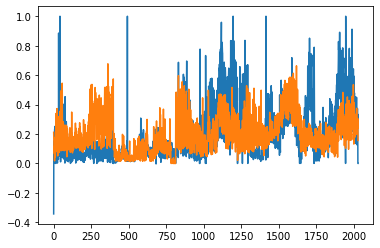

In [70]:
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Roraima


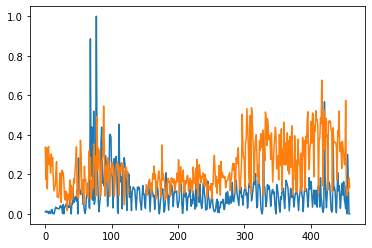

In [71]:
X_test = mobility_dict[regions_list_BR[22]][-460:,:]
Y_test = cases_dict[regions_list_BR[22]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[22])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Santa Catarina


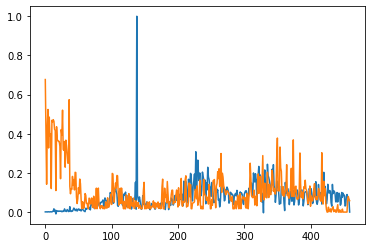

In [72]:
X_test = mobility_dict[regions_list_BR[23]][-460:,:]
Y_test = cases_dict[regions_list_BR[23]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[23])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

[[ 0.15463918  0.21904762 -0.12299465 ... -0.56701031  0.16129032
   0.62224614]
 [ 0.67010309  0.71428571 -0.42245989 ...  0.44329897 -0.48387097
   0.6385586 ]
 [ 0.69072165  0.65714286 -0.34759358 ...  0.62886598 -0.61290323
   0.63983836]
 ...
 [ 0.31818182  0.47286822 -0.0877193  ...  0.5        -0.29411765
   0.        ]
 [ 0.38636364  0.44186047  0.0877193  ...  0.52083333 -0.29411765
   0.        ]
 [ 0.43181818  0.6124031   0.29824561 ...  0.52083333 -0.35294118
   0.        ]]
[[0.2063452 ]
 [0.19364037]
 [0.2159821 ]
 [0.0910994 ]
 [0.05486176]]
Teste  State of São Paulo
[[0.18089618]
 [0.16949405]
 [0.37476835]
 [0.44720086]
 [0.38037613]]


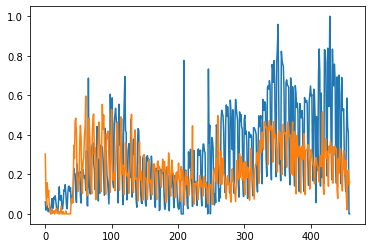

In [73]:
X_test = mobility_dict[regions_list_BR[24]][-460:,:]
Y_test = cases_dict[regions_list_BR[24]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print(X_test)
print(Y_test[50:55])
print("Teste ",regions_list_BR[24])
predict = model.predict(X_test)
print(predict[50:55])
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Sergipe


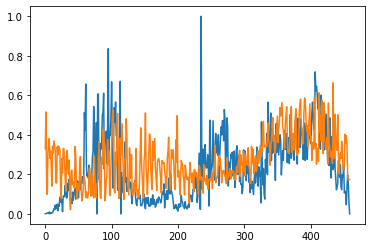

In [74]:
X_test = mobility_dict[regions_list_BR[25]][-460:,:]
Y_test = cases_dict[regions_list_BR[25]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[25])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Tocantins


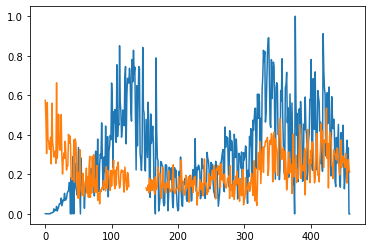

In [75]:
X_test = mobility_dict[regions_list_BR[26]][-460:,:]
Y_test = cases_dict[regions_list_BR[26]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[26])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()